In [2]:
import glob
import os, shutil
import matplotlib.pyplot as plt
import numpy as np

To generate the data first we need to prepare the folder where the muons and electrons are (`cropped_electrons2`, `cropped_muons2`), we will need to put them all together in `/gpfs/projects/damic/eVSmu_2def`

In [3]:
path = '/gpfs/projects/damic/eVSmu_2def'

In [3]:
def data_generator(inputs, targets, batch_size, num_classes, train_split, val_split, test_split, shuffle=True):
    
    #checking the parameters
    assert len(inputs) == len(targets)
    assert len(inputs) >= batch_size
    assert train_split + val_split + test_split == 1
    
    # Create list of indices
    idxs = np.arange(len(inputs))
    if shuffle:
        np.random.shuffle(idxs)

    # Reshape targets to the correct shape
    if len(targets.shape) == 1:
        print('reshaping targets')
        targets = targets.reshape(-1, 1)
        
    num_batch = 0 #index for the batches
    
    batch_tot = len(range(0, len(inputs) - batch_size + 1, batch_size)) #total number of batches

    #creating the batchs 
    for start_idx in range(0, len(inputs) - batch_size + 1, batch_size):
        excerpt = idxs[start_idx:start_idx + batch_size]
        batch_X = []
        
        for i in excerpt:
            im = np.load(inputs[i])['energy']
            batch_X.append(im)  # shape (N, 192, 242)
            
        batch_X = np.array(batch_X) #shape (batch_size, 242, 192)
        
        #creating batch of labels
        batch_y = targets[excerpt]
        
        num_batch += 1
        print(num_batch)
        a = num_batch/batch_tot
        
        #saving the batch in the corresponding directory (train, validation or test)
        if  a >= (train_split + val_split):
            np.savez('/gpfs/projects/damic/eVSmu_2test/batch%d' % num_batch, X = batch_X, y = batch_y)
        elif a > (train_split):
            np.savez('/gpfs/projects/damic/eVSmu_2val/batch%d' % num_batch, X = batch_X, y = batch_y)
        else:
            np.savez('/gpfs/projects/damic/eVSmu_2train/batch%d' % num_batch, X = batch_X, y = batch_y)

In [4]:
files = os.listdir(path)

files[0:10]

['ColdCopper_3_PV_PV_208a81z_s14_N100000_image_evt_71403_ccd_1_ind_1_pdg_11.npz',
 'ColdCopper_mu+_5p0GeV_N10000_image_evt_7500_ccd_1_ind_3_pdg_-13.npz',
 'ColdCopper_mu+_3p0GeV_N10000_image_evt_9173_ccd_2_ind_2_pdg_-13.npz',
 'ColdCopper_3_PV_PV_60a27z_s41_N100000_image_evt_67738_ccd_2_ind_0_pdg_11.npz',
 'ColdCopper_3_PV_PV_212a83z_s73_N100000_image_evt_35864_ccd_1_ind_0_pdg_11.npz',
 'ColdCopper_3_PV_PV_56a27z_s72_N100000_image_evt_52311_ccd_2_ind_0_pdg_11.npz',
 'ColdCopper_mu+_7p0GeV_N10000_image_evt_4499_ccd_2_ind_7_pdg_-13.npz',
 'ColdCopper_3_PV_PV_56a27z_s72_N100000_image_evt_28249_ccd_2_ind_0_pdg_11.npz',
 'ColdCopper_3_PV_PV_208a81z_s14_N100000_image_evt_46388_ccd_2_ind_0_pdg_11.npz',
 'ColdCopper_mu+_7p0GeV_N10000_image_evt_3097_ccd_1_ind_0_pdg_-13.npz']

In [5]:
type(files[0])

str

In [6]:
e_suffix = '11.npz'

files[0].endswith(e_suffix)

True

Let's generate the labels with the method `endswith`, where 0 stands for muons and 1 for electron:

In [7]:
y = np.zeros(shape=(len(files),))

In [8]:
for index, file in enumerate(files):     
    if files[index].endswith(e_suffix) == True:
        y[index] = 1 #electron
    else:
        y[index] = 0 #muons

In [9]:
y

array([1., 0., 0., ..., 0., 1., 0.])

Now we generate the paths of the numpy files:

In [10]:
X = np.empty(shape=(len(files),), dtype=object)

for index, file in enumerate(files):     

    X[index] = os.path.join(path, files[index]) 

In [11]:
X

array(['/gpfs/projects/damic/eVSmu_2def/ColdCopper_3_PV_PV_208a81z_s14_N100000_image_evt_71403_ccd_1_ind_1_pdg_11.npz',
       '/gpfs/projects/damic/eVSmu_2def/ColdCopper_mu+_5p0GeV_N10000_image_evt_7500_ccd_1_ind_3_pdg_-13.npz',
       '/gpfs/projects/damic/eVSmu_2def/ColdCopper_mu+_3p0GeV_N10000_image_evt_9173_ccd_2_ind_2_pdg_-13.npz',
       ...,
       '/gpfs/projects/damic/eVSmu_2def/ColdCopper_mu+_7p0GeV_N10000_image_evt_3622_ccd_2_ind_0_pdg_-13.npz',
       '/gpfs/projects/damic/eVSmu_2def/ColdCopper_3_PV_PV_56a27z_s72_N100000_image_evt_31450_ccd_2_ind_0_pdg_11.npz',
       '/gpfs/projects/damic/eVSmu_2def/ColdCopper_mu+_5p0GeV_N10000_image_evt_7140_ccd_2_ind_7_pdg_-13.npz'],
      dtype=object)

Now we generate the data:

In [ ]:
data_gen =  data_generator(inputs=X, targets=y, batch_size=64, num_classes=2, train_split = 0.6, 
                           val_split = 0.2, test_split = 0.2, shuffle=True)

#history = model.fit_generator(generator=train_gen, ...) -> in local

batch54.npz


Text(0.5, 1.0, 'Electron energy')

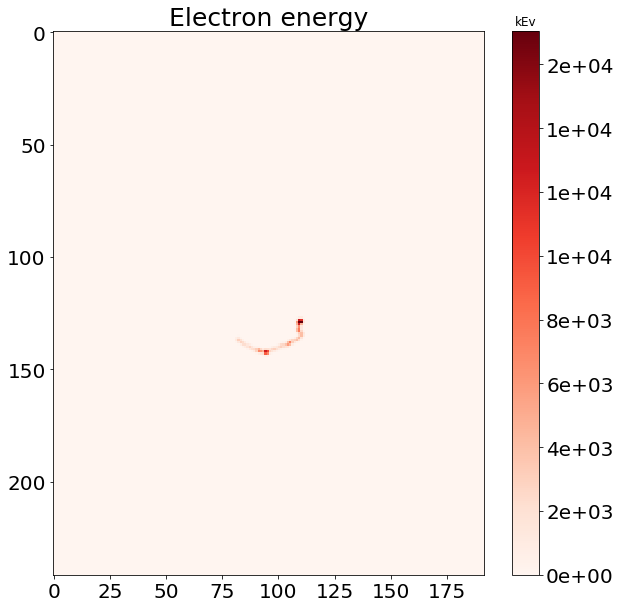

In [4]:
original_dataset_dir = '/gpfs/projects/damic/eVSmu_2train/'

files = os.listdir(original_dataset_dir)
f=76
e = np.load(os.path.join(original_dataset_dir, files[f]))['X']
print(files[f])
e = e.reshape((e.shape[0], e.shape[1], e.shape[2]))[60]

fig_e = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('kEv')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy", fontsize = 25)

In [32]:
e.std()

223.2693957929481

In [5]:
len(np.load(os.path.join(original_dataset_dir, files[f]))['X'])

64